# How to use LR for Prediction

Objective is to predict the annual inssurance based on some parameters

https://www.coverfox.com/

# Buit a Dataset. datasets_13720_18513_insurance.csv

# Age, # Gender, # Smoker, # Region, # BMI and out put Y(Insurnace)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as seabornInstance

In [27]:
#data = pd.read_csv('datasets_13720_18513_insurance_MAIN.csv')

In [28]:
#data = pd.read_csv('datasets_13720_18513_insurance_NA.csv')

In [50]:
data = pd.read_csv('datasets_13720_18513_insurance_1.csv')

In [51]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,11,10,16884.92400
1,18,8,33.770,1,22,20,1725.55230
2,28,8,33.000,3,22,20,4449.46200
3,33,8,22.705,0,22,30,21984.47061
4,32,8,28.880,0,22,30,3866.85520
...,...,...,...,...,...,...,...
1333,50,8,30.970,3,22,30,10600.54830
1334,18,2,31.920,0,22,40,2205.98080
1335,18,2,36.850,0,22,20,1629.83350
1336,21,2,25.800,0,22,10,2007.94500


# Encode the data into Numbers.....and Number Only as Input to any program in this world.....if you are a programmer.....and if .....

# Different types of data encoding formats..... we and the most widely used, accepted by ML world is ..... Put numbers in palce of words to uniquely represent the words

In [31]:
print(data.shape)

(1338, 7)


In [32]:
data.shape

(1338, 7)

# Data Checks - - Undersatnd your data before feeding it to a model

In [33]:
print(data.describe())

               age          sex          bmi     children       smoker  \
count  1338.000000  1337.000000  1337.000000  1337.000000  1337.000000   
mean     39.207025     0.495138    30.657326     1.094989     0.204188   
std      14.049960     0.500163     6.102097     1.205320     0.403258   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.220000     0.000000     0.000000   
50%      39.000000     0.000000    30.360000     1.000000     0.000000   
75%      51.000000     1.000000    34.700000     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region       charges  
count  1338.000000   1338.000000  
mean      1.484305  13269.740499  
std       1.104885  12110.447033  
min       0.000000   1121.873900  
25%       1.000000   4740.287150  
50%       1.000000   9382.033000  
75%       2.000000  16639.912515  
max       3.000000  63770.428010  


In [52]:
print(data.isnull().any())

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool


In [53]:
data = data.fillna(method='ffill')

In [54]:
print(data.isnull().any())

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool


In [55]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,11,10,16884.92400
1,18,8,33.770,1,22,20,1725.55230
2,28,8,33.000,3,22,20,4449.46200
3,33,8,22.705,0,22,30,21984.47061
4,32,8,28.880,0,22,30,3866.85520
...,...,...,...,...,...,...,...
1333,50,8,30.970,3,22,30,10600.54830
1334,18,2,31.920,0,22,40,2205.98080
1335,18,2,36.850,0,22,20,1629.83350
1336,21,2,25.800,0,22,10,2007.94500


# For LR, Seperate Out X and Y 

In [56]:
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']].values

In [57]:
X

array([[19.  ,  2.  , 27.9 ,  0.  , 11.  , 10.  ],
       [18.  ,  8.  , 33.77,  1.  , 22.  , 20.  ],
       [28.  ,  8.  , 33.  ,  3.  , 22.  , 20.  ],
       ...,
       [18.  ,  2.  , 36.85,  0.  , 22.  , 20.  ],
       [21.  ,  2.  , 25.8 ,  0.  , 22.  , 10.  ],
       [61.  ,  2.  , 29.07,  0.  , 11.  , 30.  ]])

In [58]:
X.shape

(1338, 6)

In [59]:
Y = data['charges'].values

In [60]:
Y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

# Plot and See How Our Data Looks Visually -  Always Preferred in Industry

C:\Users\Dr.PVVK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

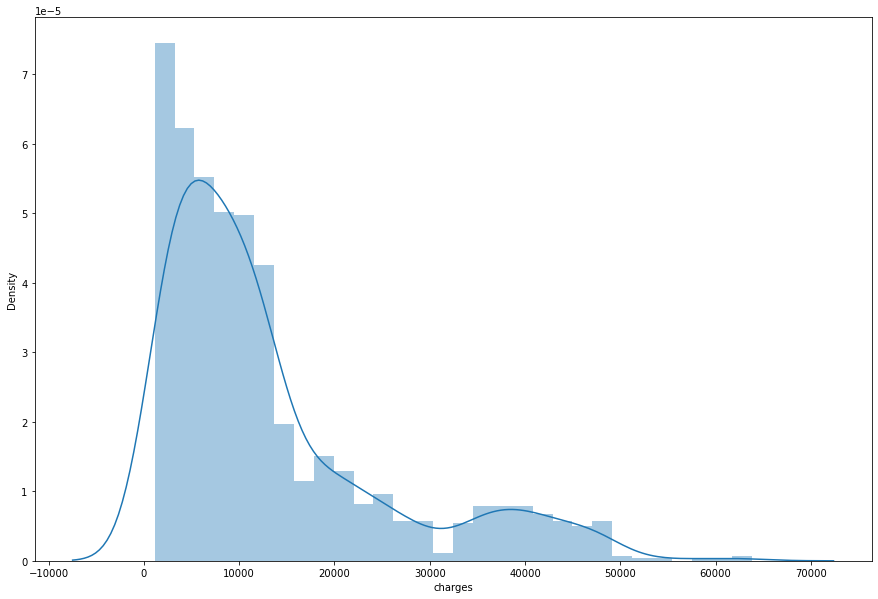

In [61]:
plt.figure(figsize = (15,10))
plt.tight_layout()
seabornInstance.distplot(data['charges'])

# Split the data into training and testing sets

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

In [63]:
X_train.shape

(936, 6)

In [64]:
X_test.shape

(402, 6)

In [65]:
X_train

array([[61.   ,  2.   , 31.16 ,  0.   , 22.   , 30.   ],
       [46.   ,  8.   , 27.6  ,  0.   , 22.   , 10.   ],
       [54.   ,  2.   , 31.9  ,  3.   , 22.   , 20.   ],
       ...,
       [58.   ,  8.   , 25.175,  0.   , 22.   , 40.   ],
       [37.   ,  2.   , 47.6  ,  2.   , 11.   , 10.   ],
       [55.   ,  8.   , 29.9  ,  0.   , 22.   , 10.   ]])

# random_state = 42, ensures that the split remains constant on every program run and it is important if you want to reproduce the results on simultaneous runs.

In [66]:
regressor = LinearRegression()

https://scikit-learn.org/stable/

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

# Training 

In [67]:
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)

In [68]:
Y_pred

array([ 8.93142116e+03,  7.07090670e+03,  3.69370805e+04,  9.59699214e+03,
        2.70083549e+04,  1.08664849e+04,  3.74610217e+01,  1.72228092e+04,
        9.18308115e+02,  1.13965537e+04,  2.79154456e+04,  9.53381323e+03,
        5.18928014e+03,  3.86124990e+04,  4.05094490e+04,  3.72748566e+04,
        1.53562559e+04,  3.59449407e+04,  9.10631783e+03,  3.14429410e+04,
        3.66298253e+03,  1.00966745e+04,  2.21091896e+03,  7.10598084e+03,
        1.13521417e+04,  1.30231210e+04,  1.44472857e+04,  6.12031303e+03,
        9.94564893e+03,  2.18617424e+03,  8.91389260e+03,  1.31869496e+04,
        4.49110116e+03,  3.30469662e+03,  4.32885102e+03,  1.32330189e+04,
        1.67071398e+03,  8.63238607e+03,  3.32727214e+04,  3.26840062e+04,
        3.60294190e+03,  4.40040903e+03,  1.40663345e+04,  1.16268203e+04,
        8.89219642e+03,  1.21011367e+04,  5.23906853e+03,  2.84241293e+03,
        3.56294259e+04,  9.27854339e+03,  1.59720792e+04,  2.34524488e+03,
        1.24695907e+04,  

In [69]:
E = sum(Y_test - Y_pred)**2

In [70]:
E

4482982170.147902

In [71]:
df = pd.DataFrame({'Actual':Y_test, 'Predicted': Y_pred})

In [72]:
df

,Actual,Predicted
0,9095.06825,8931.421164
1,5272.17580,7070.906703
2,29330.98315,36937.080496
3,9301.89355,9596.992144
4,33750.29180,27008.354871
...,...,...
397,9541.69555,16133.551618
398,4399.73100,6743.836928
399,2200.83085,2066.203492
400,11363.28320,14697.798124


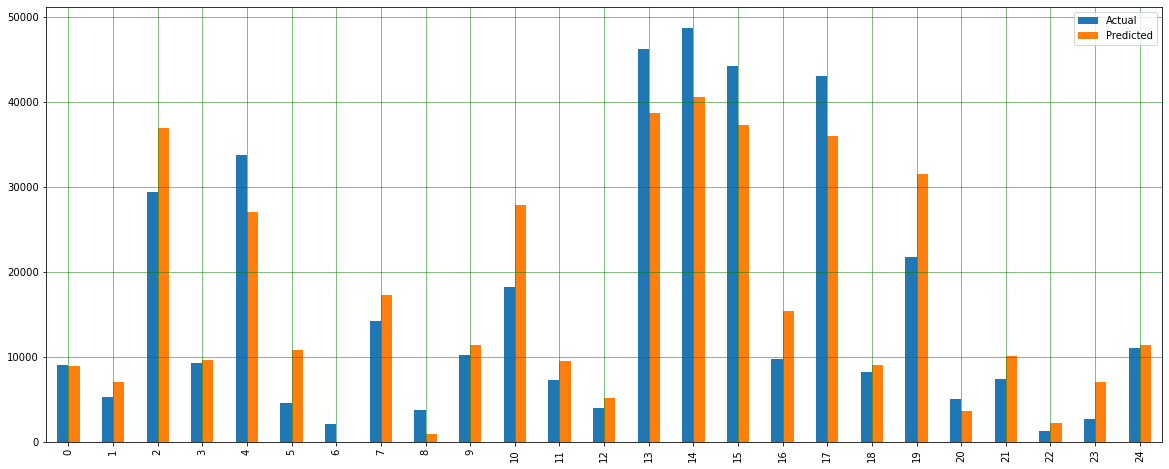

In [73]:
df1 = df.head(25)
df1.plot(kind = 'bar', figsize = (20,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [74]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 4155.2398430593785
Mean Squared Error: 33805466.89868861
Root Mean Squared Error: 5814.246890069995


# Test the Model. How .... Give inputs and check 
# Ask your Model Questions. 


# Lets ask

In [75]:
print('Enter your age:')
x1 = input()
print('Age, ' + x1)
print('Enter your sex:')
x2 = input()
print('M/F, ' + x2)
print('Enter your bmi:')
x3 = input()
print('bmi, ' + x3)
print('Enter how many childern:')
x4 = input()
print('Childern, ' + x4)
print('Enter your smoker:')
x5 = input()
print('Smoke, ' + x5)
print('Enter your region:')
x6 = input()
print('region, ' + x6)

Enter your age:
43
Age, 43
Enter your sex:
2
M/F, 2
Enter your bmi:
25
bmi, 25
Enter how many childern:
2
Childern, 2
Enter your smoker:
11
Smoke, 11
Enter your region:
10
region, 10


# Give all these inputs to your model. And ask to predict 

In [76]:
X_in = np.array([[x1], [x2], [x3], [x4], [x5],[x6]], dtype=float)

In [77]:
X_in

array([[43.],
       [ 2.],
       [25.],
       [ 2.],
       [11.],
       [10.]])

In [78]:
X_test = X_in.reshape(1, 6)

In [79]:
X_test

array([[43.,  2., 25.,  2., 11., 10.]])

In [80]:
Y_pred1 = regressor.predict(X_test)

In [81]:
print('Your Annual Insurance is', Y_pred1)

Your Annual Insurance is [30989.28908494]
